# This is a test for plotting 2D CoreFlows Results

We can describe things here!

Even with weird formulas!

$\partial_t \rho + \text{div}(\rho \mathbf{u}) = 0$

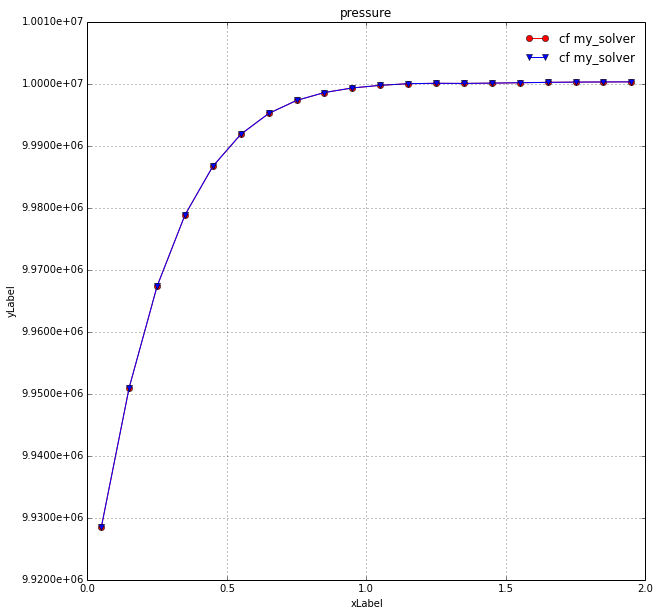

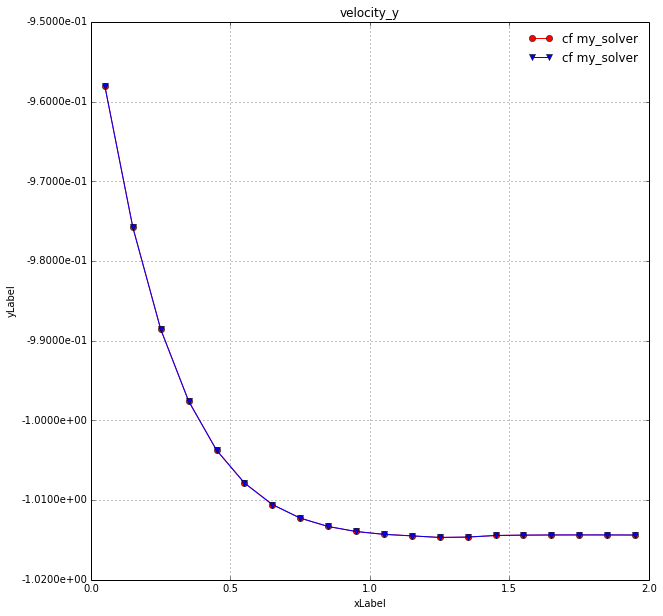

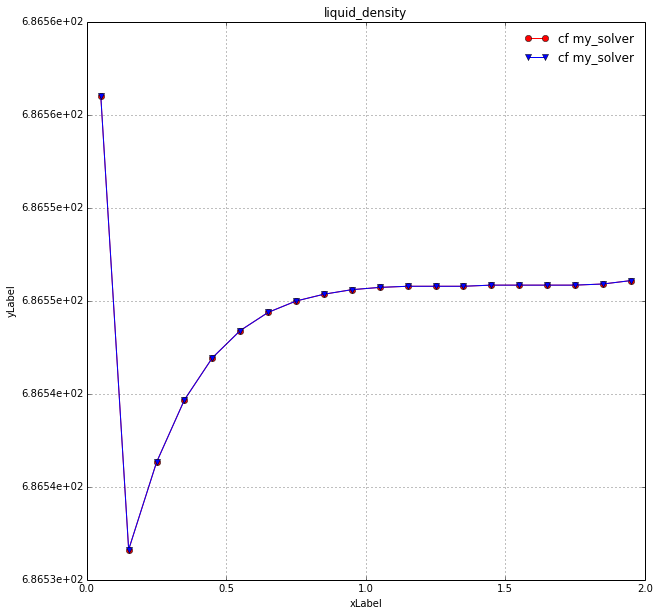

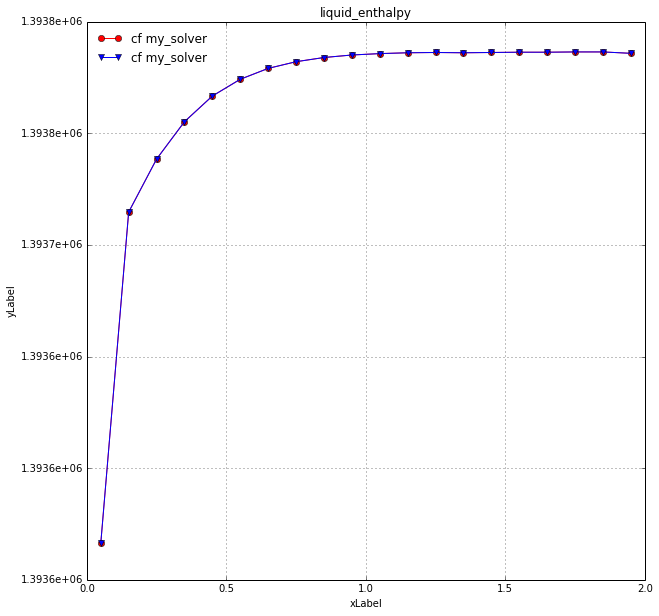

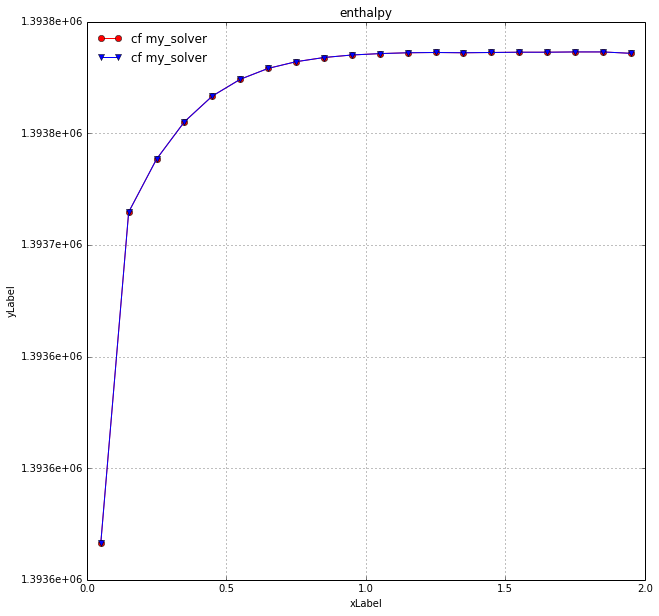

In [2]:
import os
import sys
import testEnv
%matplotlib inline

import resultsBase as rb
import default_settings as settings

path_to_test_data = "../python/tests/data"


db_cf = rb.cf_result_reader.create_result_list_2D(
    dir_list=[ os.path.join(path_to_test_data,'2D')],
    solver='my_solver')
db_cf = rb.extract_last_step_elt(db_cf)

LINES = [
    {'point': [0.25, 0, 0], 'direction': [0, 1, 0], 'name': 'line=1'},
    {'point': [0.25, 0, 0], 'direction': [0, 1, 0], 'name': 'line=2'},
    ]

# create all CoreFlows probes
CF_PROBES = [rb.Probe( res, line['name'], line=line,
    ExtractData = rb.cf_result_reader.extract_data_2d_over_line,
    tags = [line['name']])
    for line in LINES
    for res in db_cf
    ]
    
y_range = {
    'axial_velocity': [0.8, 1.2],
    'liquid_density': [7.16e2, 7.17e2],
    'liquid_enthalpy': [1.29e6, 1.31e6],
}

my_settings = {
    '*line=1*' : {'marker':'o', 'color': 'red'},
    '*line=2*' : {'marker':'v', 'color': 'blue'}
}


VARIABLES = ['pressure', 'velocity_y','liquid_density', 'liquid_enthalpy', 'enthalpy']

for solver in ['my_solver']:
    for variable in VARIABLES:
        probes = [p for p in CF_PROBES
            if p.variable == variable
            if solver in p.master_tag
            ]
        data_view = rb.DataView()
        data_view.append_probes(probes)
        data_view.set_title(variable)
        data_view.plot(view_settings=my_settings)
